# Aprendizagem Automática Avançada

**Alunos:**
    João Raimundo (57454), Rui Roque (57588)
    
    


## Assigment #2 - SVM

### 0.1 - Import Libraries

In [2]:
# importação das bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

### 0.2 - Importação dos Dados

In [2]:
# importação do conjunto de dados Íris
iris = datasets.load_iris()
X = iris.data[:, :2] # features
y = iris.target # target

### 0.3 - Criação da grelha de visualização

In [3]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# Problema 4

O problema 4 destina-se a avaliar o comportamento de método de aprendizagem supervisionada de Support Vector Machines (SVM) quando são eliminados alguns vetores de suporte.

Deste modo, selecionamos um dos modelos treinados do Problema 3 com os parâmetros C=1 e gamma=0.01, segundo um kernel de função polinomial ao conjunto de dados da *Íris*.

In [4]:
# definição de uma função (*svm_plot()*) que irá fazer o predict e o gráfico do modelo SVM
def svm_plot(f):
    
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title('SVC with ' + f + ' kernel')
    plt.show()

**C = 1 e gamma = 0.01:**


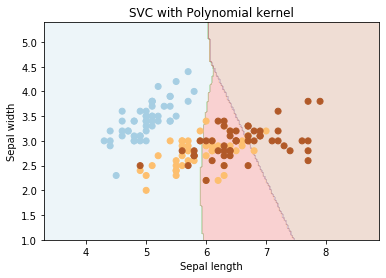

In [5]:
# fit do conjunto de dados *Íris* com o modelo SVM; C=1, gamma=0.01
svc = svm.SVC(kernel='poly', C=1,gamma=0.01).fit(X, y)

# invocação da função criada para visualizar o gráfico
svm_plot("Polynomial")

**Figura 1 -** Modelo SVM com função Polinomial; C=1, gamma=0.01.

**O que acontece quando alguns vetores de suporte são removidos?**

In [6]:
# verificar os indices dos vetores de suporte criados pelo modelo SVM após o treino
print(svc.support_)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149]


**Remoção de alguns support vectors:**

In [7]:
# remoção de alguns vetores de suporte de forma aleatória
svc.support_ = np.delete(svc.support_, [0, 10, 20 ,30, 15, 25], None)

# verificar os indices dos vetores de suporte após remoção
print(svc.support_)

[  1   2   3   4   5   6   7   8   9  11  12  13  14  16  17  18  19  21
  22  23  24  26  27  28  29  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149]


**Visualização gráfica após a remoção de alguns support vectors:**

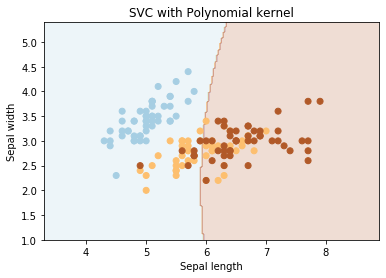

In [8]:
# invocação da função criada para visualizar o gráfico
svm_plot("Polynomial")

**Figura 2 -** Modelo SVM com função Polinomial com remoção de alguns vetores de suporte; C=1, gamma=0.01.

Os vetores de suporte definem as margens de decisão que separam as duas classes do conjunto de dados. Deste modo, na **Figura 2** é possível verificar que após a remoção de alguns destes vetores de suporte perdemos um limite de decisão no modelo SVM, em comparação com a **Figura 1**. Ocorrendo apenas a separação das classes representadas pelos pontos a azul e vermelho - a classe amarela não apresenta um limite classificatório e estão classificados com integrantes da classe azul e vermelha.

Adicionalmente, alguns pontos vermelhos apresentam-se classificados como pertencentes à classe azul, encontramdo-se mal classificados.

# Problema 5

O problema 5 destina-se a encontrar os melhores parâmetros para treinar o modelo SVM com uma função kernel polinomial, e comparar os resultados obtidos usando os parâmetros de treino *default* (C=1, gamma='scale').

Como primeiro passo foi realizada a divisão do conjunto de dados em dados de treino e de teste (subconjunto de validação):

In [9]:
# divisão do conjunto de dados em treino e validação
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Depois foi utilizado a função *gridSearchCV* para descobrir os melhores parâmetros do modelo com o kernel de função polinomial:

In [10]:
# definição dos parâmetros a serem usados
param_grid = [  {"C": [1, 10, 100], "gamma": [0.01, 10, 100]}]

# definição do modelo SVM
svc = svm.SVC(kernel='poly')

# gridSearchCV
grid_cv = GridSearchCV(estimator= svc,param_grid=param_grid, cv=5).fit(X_train, y_train)

print(grid_cv.best_params_)

{'C': 100, 'gamma': 0.01}


Os melhores parâmetros calculados para este modelo são: **C**=100 e **gamma**=0.01.

Treino do modelo SVM com os melhores parâmetros calculados e respetivos scores:

In [11]:
# fit do conjunto treino com o modelo SVM; C=100, gamma=0.01
svc = svm.SVC(kernel='poly', C=100,gamma=0.01).fit(X_train, y_train)

# predict com o conjunto de teste
svc_pred = svc.predict(X_test)

# cálculo de alguns scores
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.64      0.70        11
           2       0.71      0.83      0.77        12

    accuracy                           0.84        38
   macro avg       0.83      0.82      0.82        38
weighted avg       0.85      0.84      0.84        38



**Treino do modelo com os parâmetros *default* para comparação**:

In [12]:
# fit do conjunto treino com o modelo SVM com os parâmetros default
svc = svm.SVC(kernel='poly').fit(X_train, y_train)

# predict
svc_pred = svc.predict(X_test)

# cálculo de alguns scores
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.58      0.64      0.61        11
           2       0.64      0.58      0.61        12

    accuracy                           0.76        38
   macro avg       0.74      0.74      0.74        38
weighted avg       0.76      0.76      0.76        38



Comparando o modelo treinado com os parâmetros calculados pelo *GridSearchCV* com o modelo treinado com os parâmetros *default*, verifica-se que:

 * **Para a classe 0:** os *scores* em todas as métricas em ambos os modelos são iguais.
 * **Para a classe 1:** os *scores* obtidos pelo modelo treinado com os parâmetros calculados pelo *GridSearchCV* são melhores em todas as métricas, excepto no *recall* que é igual.
 * **Para a classe 2:** os *scores* obtidos pelo modelo treinado com os parâmetros calculados pelo *GridSearchCV* são melhores em todas as métricas.

# **Problem 6**

**Importação das coordenadas dos pontos e respetiva classe:**

In [3]:
# importação das coordenadas dos pontos e respetiva classe
points = pd.read_csv("points.csv")

points

,x,y,color
0,-6.50,4.75,Red
1,-5.70,3.20,Red
2,-5.00,2.20,Red
3,-3.20,1.25,Red
4,-2.20,1.10,Red
5,-1.20,0.80,Red
6,1.25,0.70,Red
7,3.00,1.00,Red
8,4.20,1.70,Red
9,5.00,2.00,Red


Divisão dos dados em *features* e *target*. A coluna/classe "color" foi convertida para valores binários, passando a cor vermelha a 1 e a cor azul a 0:

In [4]:
# conversão do valor da classe de cada ponto de categórico para binário: Red=1, Blue=0
color = {"Red":1, "Blue": 0}
target = points["color"].map(color) # definição da variável target

# definicão da variável features
X = points[['x','y']]

In [5]:
X 

,x,y
0,-6.50,4.75
1,-5.70,3.20
2,-5.00,2.20
3,-3.20,1.25
4,-2.20,1.10
5,-1.20,0.80
6,1.25,0.70
7,3.00,1.00
8,4.20,1.70
9,5.00,2.00


In [6]:
target

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
Name: color, dtype: int64

### Criação de uma nova grelha para a representação deste novo conjunto de pontos:

In [7]:
# criação de uma grelha para representar os gráficos
X = np.array(X)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = -(x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

### **Representação gráfica dos pontos:**

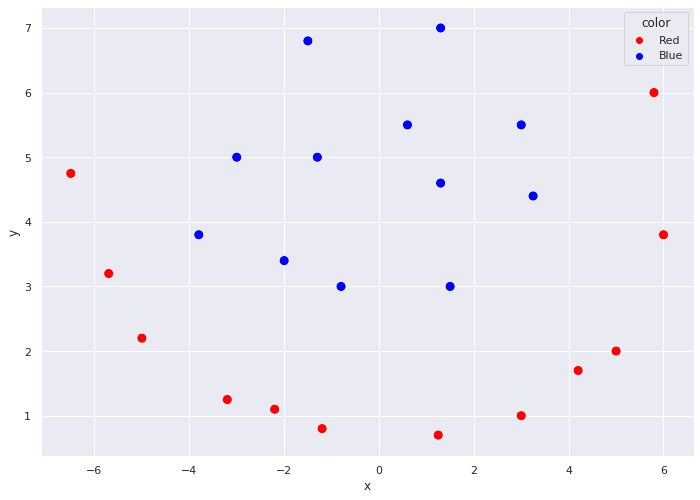

In [8]:
# definição da resolução da janela de visualização
sns.set(rc={'figure.figsize':(11.7,8.27)})

# criação do gráfico de pontos
sns.scatterplot(data=points, x="x", y="y", hue="color",palette=["red", "blue"], s = 100)

Como é possível ver na figura acima, não é possível traçar uma reta (kernel de função linear) para separar as duas classes, desta forma foi adicionada uma nova *feature* (z), de maneira a que nesta nova dimensão permitisse separar as duas classes por um kernel de função linear (custom kernel). Esta nova feature é definida pela função: $z= \sqrt{x + 6.6} + \sqrt{y}$

De forma a não obtermos coordenadas segundo o eixo xx negativas nem nulas, foi somado 6.6 ao valor da variável 'x'. 

In [9]:
x = points.x  # coordenada x dos pontos
y = points.y  # coodenada y dos pontos

# definição da nova feature z, segundo uma função
z =np.sqrt(x + 6.6) + np.sqrt(y) 

# criação de uma coluna com os valores calculados anteriormente pela função
points["z"] = z

**Representação dos pontos segundo o eixo x e nova feature z:**

In [10]:
# criação de uma nova grelha segundo o eixo do x e z
X2 = points[['x','z']] # definição da variável features segundo o 'x' e o 'z'
X2 = np.array(X2)
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
h = -(x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

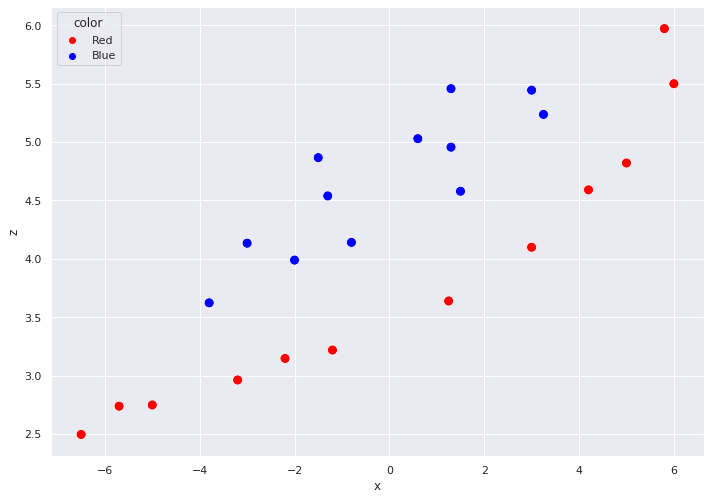

In [11]:
# criação do gráfico de pontos segundo a função de custom kernel
sns.scatterplot(data=points, x="x", y="z", hue="color",palette=["red", "blue"], s = 100)

### **De seguida o modelo SVM foi criado, treinado e representado gráficamente. É possivel visualizar o limite decisão criado pela nova feature.**

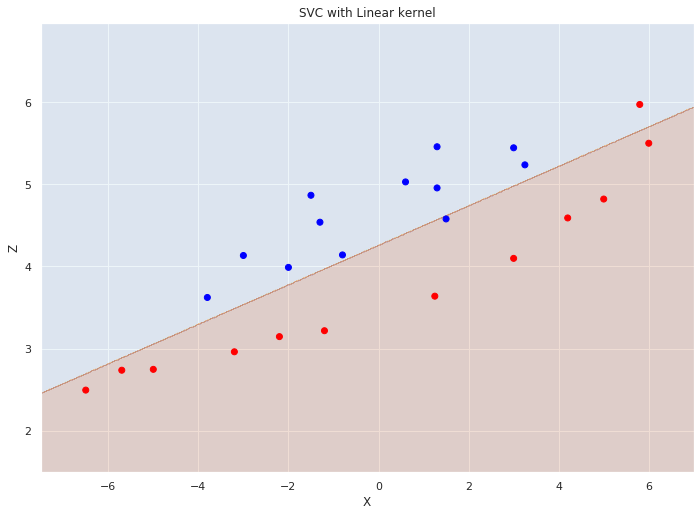

In [12]:
svc = svm.SVC(kernel='linear', C=1000,gamma=0.01).fit(X2, target)

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

plt.scatter(points["x"], points["z"], c=points["color"], cmap=plt.cm.Paired)
plt.xlabel('X')
plt.ylabel('Z')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Linear kernel')
plt.show()

É possível verificar que segundo o limite de decisão calculado, existem dois pontos que estão mal classificados, um de cada classe, não só por causa da função definida mas também devido ao modelo não ter conseguido maximizar de forma eficaz o valor da distância entre o vetor de suporte e a margem.

**Representação 3D dos pontos:**

In [13]:
# criação do gráfico 3D
fig = px.scatter_3d( x=x, y=y,z=z,color = points['color'])
fig.show()

### Agora será utilizado o classificador SVM do *scikit-learn* com diferentes *kernels* de forma a tentar solucionar o problema e comparar com a solução obtida anteriormente:

In [14]:
# criação de uma grelha para representar os gráficos
X = np.array(X)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = -(x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

* **SVM com kernel de função linear, C = 1000, gamma = 0.01:**

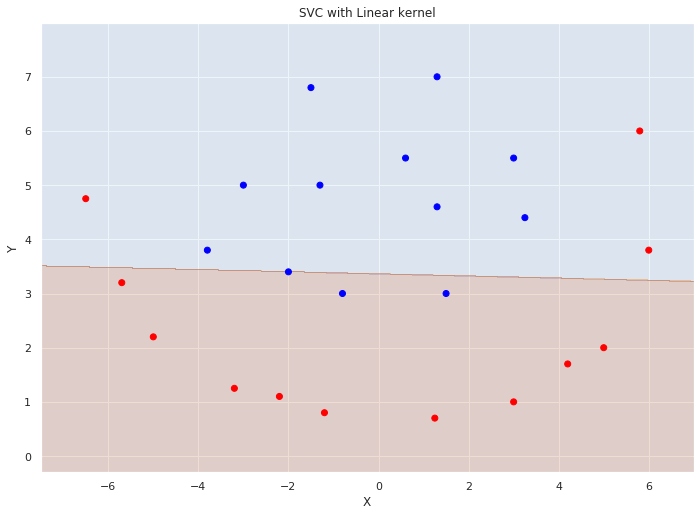

In [15]:
svc = svm.SVC(kernel='linear', C=1000,gamma=0.01).fit(X, target)

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

plt.scatter(points["x"], points["y"], c=points["color"], cmap=plt.cm.Paired)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Linear kernel')
plt.show()

Segundo a figura acima, o kernel de função linear não será a melhor solução para este problema visto que existe um elevado número de pontos que não se encontram bem classificados. Uma vez não tomou partido de uma nova feature/dimensão como a que foi criada no treino do modelo SVM anterior.

* **SVM com kernel de função polinomial, C = 1000, gamma = 0.01:**

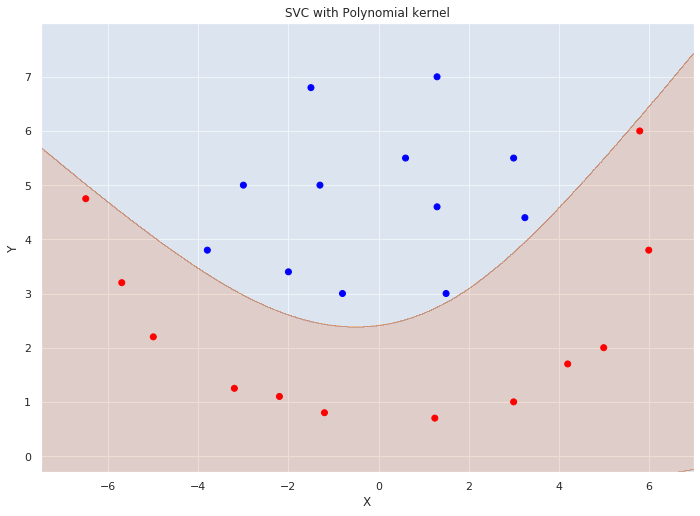

In [16]:
svc = svm.SVC(kernel='poly', C=1000,gamma=0.01).fit(X, target)

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

plt.scatter(points["x"], points["y"], c=points["color"], cmap=plt.cm.Paired)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Polynomial kernel')
plt.show()

Já o kernel de função polinomial, apresenta uma melhor delineação das classes em comparação aos resultados obtidos pelo treino dos modelos lineares (kernel de função custom e linear), visto que nenhum dos pontos está mal classificado.

Porém poderá haver alguma má classificação para novos pontos pelo facto de a margem se encontrar muito próxima dos support vectors.

 * **SVM com RBF kernel, C = 1000, gamma = 0.01:**

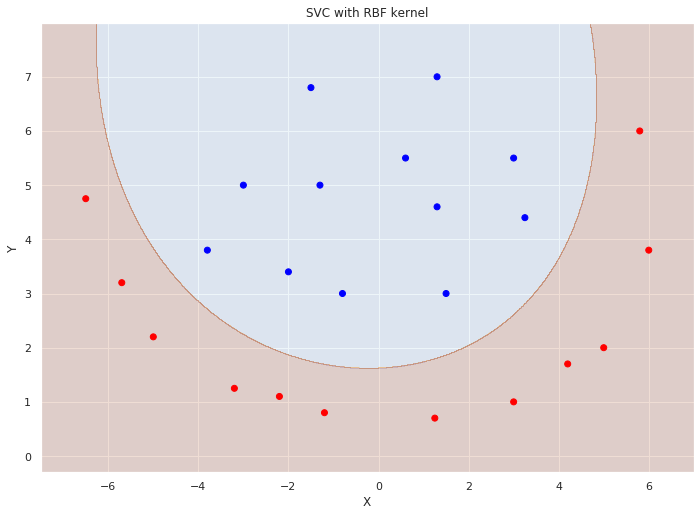

In [17]:
svc = svm.SVC(kernel='rbf', C=1000,gamma=0.01).fit(X, target)

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

plt.scatter(points["x"], points["y"], c=points["color"], cmap=plt.cm.Paired)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel')
plt.show()

Por sua vez, o modelo SVM treinado com o kernel de função radial (RBF) apresenta uma boa classificação entre as duas classes do conjunto de dados. Não existem pontos mal classificados e a margem que separa as duas classes encontra-se mais afastada dos vetores de suporte, quando comparado ao modelo com um kernel polinomial (apresentado anteriormente).

Nota: contudo, com um elevado número de features o kernel RBF vai diminuindo a sua capacidade classificatória, pelo que não pode ser considerado uma solução ótima para todo o tipo de problemas. 